In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_activities = pd.read_csv('/Users/nickx/Documents/school_work/21FA/info_656_machine_learning/ml_final_project/data/strava_activities_all_fields.csv')

df_runs = df_activities[df_activities['type'] == 'Run']
df_runs.head(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts
0,0,2,Long run,22105.2,7208,7328,135.9,Run,0.0,6283890938,...,1,a6283890938,g~iwFhnnbM}Iz@}Ez@sCHmEz@gEHuAZi@Is@Z_D^g@X}@G...,2,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Recovery run,6061.1,2125,2363,46.5,Run,0.0,6276813009,...,1,a6276813009,w_jwFrmnbMIBR@E@ECN?@Bk@BWEAJc@T]HGDAJ@n@ARB^A...,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Workout Wednesday,9850.0,3004,3018,0.0,Run,0.0,6272684257,...,1,a6272684257,kfpwFrujbMFA?IFDDCJFBI|@B@GhBSJIT[Je@C]O_@QQUI...,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,Morning Run,9980.3,3159,3285,100.6,Run,0.0,6265381398,...,1,a6265381398,o}iwFtmnbMADECGBACKFSEW@gBVEFQx@UdBEFSFFV?\ErB...,2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,Morning Run,9769.7,3474,3597,70.4,Run,NaN,6260936496,...,1,a6260936496,_}iwFtnnbMB@CEJO?D@IF?Ea@DBDAHJAKJEBKHD^OPC@C@...,2,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,Easy Sunday in Philly,6602.1,2269,2280,25.9,Run,0.0,6256778448,...,1,a6256778448,ubzrFtctiMH@?HDADD@Ax@JV?V?P@VOV?b@JZTLBNATeAB...,2,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2,Friday night endurance,12758.2,4410,4749,117.3,Run,0.0,6249249996,...,1,a6249249996,a~iwF`mnbMGA_@^SJIECFCKE?EFkANQJEVE~ASdADhBIb@...,2,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2,Recovery,6155.4,2306,2445,43.6,Run,0.0,6242906333,...,1,a6242906333,c}iwF|mnbMDQCBEAEHuAZ_@Fm@PO@EFCNMTEVIdACn@@LA...,2,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2,Track workout with Bryan,10120.6,2911,3141,0.0,Run,0.0,6240896496,...,1,a6240896496,oepwFhujbMFGGTPMNFJ?NM?D`@GpA_@VMXWNYLe@?]Si@[...,2,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2,Tempo,9942.7,3203,3323,101.3,Run,0.0,6233556473,...,1,a6233556473,q}iwFbnnbMIFk@Hg@Ni@?i@JGDET?n@Gh@?`AEN@REZBNS...,2,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Distance (meters)')

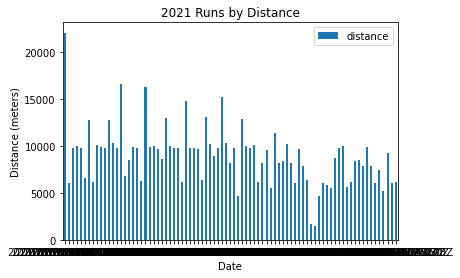

In [5]:
df_runs.plot.bar(x='start_date_local', y= 'distance', rot=0)

plt.title("2021 Runs by Distance")
plt.xlabel("Date")
plt.ylabel("Distance (meters)")

In [6]:
#select only the runs since I started back after injury on May 31
#look at the last 10 rows to make sure I've got the right starting point
df_runs = df_runs[(df_runs['start_date_local'] >= '2021-05-31 00:00:00+00:00')]
df_runs.tail(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts
108,108,2,Promenade loop,6171.9,2061,2195,44.4,Run,0.0,5631283581,...,1,a5631283581,o}iwF|lnbMMJM@ELM@MJB?CAc@FeAHSHGHG\ExAMt@AhA@...,2,NaN,NaN,NaN,NaN,NaN,NaN
112,112,2,The usual BK corner pocket,8417.2,2878,3012,44.6,Run,0.0,5615347355,...,1,a5615347355,g~iwF`nnbMIBEA?DG@?CCA_@PAEEB]B{@PSFGXAdAOhAGf...,2,NaN,NaN,NaN,NaN,NaN,NaN
113,113,2,Tried to beat the heat,8488.2,2925,3002,44.4,Run,0.0,5584311704,...,1,a5584311704,_~iwFzmnbMDEAAI?KLCCE@FCABICQD_@PEGIJoANMDGNOp...,2,NaN,NaN,NaN,NaN,NaN,NaN
115,115,2,Taking it easy,7929.5,2731,2790,44.4,Run,0.0,5569082551,...,1,a5569082551,{}iwFrmnbMLIFDN@HIADBED@RCFEF@FC?B?EDFt@OF@@DF...,2,NaN,NaN,NaN,NaN,NaN,NaN
117,117,2,Afternoon Run,9917.9,3174,3174,41.5,Run,0.0,5550115667,...,1,a5550115667,}rywEbkmyNQ@CCKNGCEFGABDOME@OPEAIDWD@C[DkB?SAI...,2,NaN,NaN,NaN,NaN,NaN,NaN
122,122,2,Morning Run,7834.7,2560,2634,42.4,Run,0.0,5510924618,...,1,a5510924618,g~iwFzlnbMLA\f@DKCE?D@?JG?E|@CZGLBDN@x@Lj@Ad@F...,2,NaN,NaN,NaN,NaN,NaN,NaN
128,128,2,Lunch Run,6103.5,1970,2067,43.0,Run,0.0,5469190889,...,1,a5469190889,o~iwFtnnbM?QEJFAG@EHI@BMEJBICF@JECKCG?IBG?@@DB...,2,NaN,NaN,NaN,NaN,NaN,NaN
132,132,2,Focusing on form,7458.6,2597,2717,41.2,Run,0.0,5446305492,...,1,a5446305492,w}iwFtmnbMAADZ@??UHI@JRQF@ES^D^CXDFHFl@TdAD`@A...,2,NaN,NaN,NaN,NaN,NaN,NaN
136,136,2,Rain run,5232.0,1731,1825,47.5,Run,0.0,5406525676,...,1,a5406525676,k~iwFdmnbMFD[]HZ@PCCKBIDD?EAGHSAKE?FMDCFODQA[F...,2,NaN,NaN,NaN,NaN,NaN,NaN
139,139,2,Back up plan,9316.0,2988,3069,70.7,Run,0.0,5389462020,...,1,a5389462020,o}iwFnnnbMBMNK@IF?@EBBPEDD@EJGCELHJCBUNGDICoAE...,2,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#The Strava API delivers the "distance" field in meters, so I'll need to convert it to miles
df_runs["miles"] = df_runs["distance"] * 0.000621371

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/28458480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs["miles"] = df_runs["distance"] * 0.000621371


In [8]:
#Runners typically think of their "speed" in terms of "pace", or "minutes per mile"
#The Strava API delivers speed in units of "meters per second", so I'll need to convert that to "minutes per mile"
#so that it's more useful for runners
df_runs["pace"] =  26.8224/(df_runs["average_speed"])

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/228501603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs["pace"] =  26.8224/(df_runs["average_speed"])


In [9]:
#of course, now we have "pace" written as a base-10 number, rather than minutes and seconds. I'll need to fix this.
#cast 'pace' as string in order to split minutes and seconds
df_runs['pace']=df_runs['pace'].astype(str)

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2297148082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['pace']=df_runs['pace'].astype(str)


In [10]:
#separating minutes and decimals into separate columns to calculate 'seconds'
df_runs[['minutes', 'seconds']] = df_runs['pace'].str.split('.', expand=True)
# display the dataframe
df_runs

C:\Users\nickx\anaconda3\envs\python_dev\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts,miles,pace,minutes,seconds
0,0,2,Long run,22105.2,7208,7328,135.9,Run,0.0,6283890938,...,NaN,NaN,NaN,NaN,NaN,NaN,13.735530,8.745484186501466,8,745484186501466
1,1,2,Recovery run,6061.1,2125,2363,46.5,Run,0.0,6276813009,...,NaN,NaN,NaN,NaN,NaN,NaN,3.766192,9.40476858345021,9,40476858345021
2,2,2,Workout Wednesday,9850.0,3004,3018,0.0,Run,0.0,6272684257,...,NaN,NaN,NaN,NaN,NaN,NaN,6.120504,8.180054894784995,8,180054894784995
3,3,2,Morning Run,9980.3,3159,3285,100.6,Run,0.0,6265381398,...,NaN,NaN,NaN,NaN,NaN,NaN,6.201469,8.490788224121557,8,490788224121557
4,4,2,Morning Run,9769.7,3474,3597,70.4,Run,NaN,6260936496,...,NaN,NaN,NaN,NaN,NaN,NaN,6.070608,9.538549075391181,9,538549075391181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,122,2,Morning Run,7834.7,2560,2634,42.4,Run,0.0,5510924618,...,NaN,NaN,NaN,NaN,NaN,NaN,4.868255,8.765490196078431,8,765490196078431
128,128,2,Lunch Run,6103.5,1970,2067,43.0,Run,0.0,5469190889,...,NaN,NaN,NaN,NaN,NaN,NaN,3.792538,8.65797288573273,8,65797288573273
132,132,2,Focusing on form,7458.6,2597,2717,41.2,Run,0.0,5446305492,...,NaN,NaN,NaN,NaN,NaN,NaN,4.634558,9.339275766016712,9,339275766016712
136,136,2,Rain run,5232.0,1731,1825,47.5,Run,0.0,5406525676,...,NaN,NaN,NaN,NaN,NaN,NaN,3.251013,8.872775388686733,8,872775388686733


In [11]:
#adding a decimal point to the "seconds" column in order to transform it to actual seconds
df_runs['seconds']='0.'+df_runs['seconds']

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2725940482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['seconds']='0.'+df_runs['seconds']


In [12]:
df_runs['seconds']=df_runs['seconds'].astype(float)
df_runs['minutes']=df_runs['minutes'].astype(int)

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2254216376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['seconds']=df_runs['seconds'].astype(float)
C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2254216376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['minutes']=df_runs['minutes'].astype(int)


In [13]:
df_runs.head(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts,miles,pace,minutes,seconds
0,0,2,Long run,22105.2,7208,7328,135.9,Run,0.0,6283890938,...,NaN,NaN,NaN,NaN,NaN,NaN,13.735530,8.745484186501466,8,0.745484
1,1,2,Recovery run,6061.1,2125,2363,46.5,Run,0.0,6276813009,...,NaN,NaN,NaN,NaN,NaN,NaN,3.766192,9.40476858345021,9,0.404769
2,2,2,Workout Wednesday,9850.0,3004,3018,0.0,Run,0.0,6272684257,...,NaN,NaN,NaN,NaN,NaN,NaN,6.120504,8.180054894784995,8,0.180055
3,3,2,Morning Run,9980.3,3159,3285,100.6,Run,0.0,6265381398,...,NaN,NaN,NaN,NaN,NaN,NaN,6.201469,8.490788224121557,8,0.490788
4,4,2,Morning Run,9769.7,3474,3597,70.4,Run,NaN,6260936496,...,NaN,NaN,NaN,NaN,NaN,NaN,6.070608,9.538549075391181,9,0.538549
5,5,2,Easy Sunday in Philly,6602.1,2269,2280,25.9,Run,0.0,6256778448,...,NaN,NaN,NaN,NaN,NaN,NaN,4.102353,9.217319587628864,9,0.217320
6,6,2,Friday night endurance,12758.2,4410,4749,117.3,Run,0.0,6249249996,...,NaN,NaN,NaN,NaN,NaN,NaN,7.927575,9.271482889733841,9,0.271483
7,7,2,Recovery,6155.4,2306,2445,43.6,Run,0.0,6242906333,...,NaN,NaN,NaN,NaN,NaN,NaN,3.824787,10.049606594230047,10,0.049607
8,8,2,Track workout with Bryan,10120.6,2911,3141,0.0,Run,0.0,6240896496,...,NaN,NaN,NaN,NaN,NaN,NaN,6.288647,7.714236410698878,7,0.714236
9,9,2,Tempo,9942.7,3203,3323,101.3,Run,0.0,6233556473,...,NaN,NaN,NaN,NaN,NaN,NaN,6.178105,8.641237113402061,8,0.641237


In [14]:
#Converting "seconds" column from base-10 decimal to actual seconds
df_runs['seconds']=df_runs['seconds']*60

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2251162627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['seconds']=df_runs['seconds']*60


In [15]:
#rounding seconds column to nearest whole number, and then casting it as an integer
df_runs['seconds']=round(df_runs['seconds'])
df_runs['seconds']=df_runs['seconds'].astype(int)

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/1292337816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['seconds']=round(df_runs['seconds'])
C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/1292337816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['seconds']=df_runs['seconds'].astype(int)


In [16]:
#inspecting the dataframe one more time to make sure everything looks good
df_runs.head(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts,miles,pace,minutes,seconds
0,0,2,Long run,22105.2,7208,7328,135.9,Run,0.0,6283890938,...,NaN,NaN,NaN,NaN,NaN,NaN,13.735530,8.745484186501466,8,45
1,1,2,Recovery run,6061.1,2125,2363,46.5,Run,0.0,6276813009,...,NaN,NaN,NaN,NaN,NaN,NaN,3.766192,9.40476858345021,9,24
2,2,2,Workout Wednesday,9850.0,3004,3018,0.0,Run,0.0,6272684257,...,NaN,NaN,NaN,NaN,NaN,NaN,6.120504,8.180054894784995,8,11
3,3,2,Morning Run,9980.3,3159,3285,100.6,Run,0.0,6265381398,...,NaN,NaN,NaN,NaN,NaN,NaN,6.201469,8.490788224121557,8,29
4,4,2,Morning Run,9769.7,3474,3597,70.4,Run,NaN,6260936496,...,NaN,NaN,NaN,NaN,NaN,NaN,6.070608,9.538549075391181,9,32
5,5,2,Easy Sunday in Philly,6602.1,2269,2280,25.9,Run,0.0,6256778448,...,NaN,NaN,NaN,NaN,NaN,NaN,4.102353,9.217319587628864,9,13
6,6,2,Friday night endurance,12758.2,4410,4749,117.3,Run,0.0,6249249996,...,NaN,NaN,NaN,NaN,NaN,NaN,7.927575,9.271482889733841,9,16
7,7,2,Recovery,6155.4,2306,2445,43.6,Run,0.0,6242906333,...,NaN,NaN,NaN,NaN,NaN,NaN,3.824787,10.049606594230047,10,3
8,8,2,Track workout with Bryan,10120.6,2911,3141,0.0,Run,0.0,6240896496,...,NaN,NaN,NaN,NaN,NaN,NaN,6.288647,7.714236410698878,7,43
9,9,2,Tempo,9942.7,3203,3323,101.3,Run,0.0,6233556473,...,NaN,NaN,NaN,NaN,NaN,NaN,6.178105,8.641237113402061,8,38


In [17]:
#converting "elevation" column from meters to feet
df_runs['elevation']=df_runs['total_elevation_gain']*3.28084

C:\Users\nickx\AppData\Local\Temp/ipykernel_8724/2390146378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['elevation']=df_runs['total_elevation_gain']*3.28084


In [18]:
#finally, creating a features dataframe with the variables I'm most interested in, 
#and target dataframe to start doing some machine learning!
df_features = df_runs[['miles', 'elevation', 'minutes', 'seconds']]
df_target = df_runs['average_heartrate']

In [19]:
df_features

,miles,elevation,minutes,seconds
0,13.735530,445.866156,8,45
1,3.766192,152.559060,9,24
2,6.120504,0.000000,8,11
3,6.201469,330.052504,8,29
4,6.070608,230.971136,9,32
...,...,...,...,...
122,4.868255,139.107616,8,46
128,3.792538,141.076120,8,39
132,4.634558,135.170608,9,20
136,3.251013,155.839900,8,52


In [20]:
df_target

0      164.6
1      158.3
2      172.2
3      165.2
4      148.1
       ...  
122    176.6
128    172.4
132    172.6
136    173.6
139    183.8
Name: average_heartrate, Length: 81, dtype: float64

In [88]:
X, y = df_features, df_target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         
                                                random_state=42)

In [89]:
#trying a regression model first. Using cross-validation to try to improve accuracy since the training set is so small.
step_list_linear = [('scaler', StandardScaler()), 
             ('reg', ElasticNetCV(cv=20))
            ]
pipe_linear = Pipeline(steps=step_list_linear)
pipe_linear

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNetCV(cv=20))])

In [90]:
pipe_linear.fit(X_train.values, y_train.values)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNetCV(cv=20))])

In [91]:
pipe_linear.score(X_test.values, y_test.values)

0.5097944578098745

In [92]:
#select a row from the features dataset to test the model
row=df_features.iloc[1]
model=pipe_linear
row=row.array.reshape(1, -1)
model.predict(row)

array([164.14537068])

In [93]:
#created a function to show the heartrate "zone" for the result. This provides a little more context for the results of the model.
def effort_linear_regression(row, model):
    
    result = model.predict(row)
    
    if result <= 120:
        print("Average HR: "+str(result))
        print("Zone 1 - Easy Effort")
    
    if result > 120 and result <= 150:
        print("Average HR: "+str(result))
        print("Zone 2 - Endurance Effort")
    
    if result > 150 and result <= 170:
        print("Average HR: "+str(result))
        print("Zone 3 - Moderate Effort")
    
    if result > 170 and result <= 180:
        print("Average HR: "+str(result))
        print("Zone 4 - Threshold Effort")
    
    if result > 180:
        print("Average HR: "+str(result))
        print("Zone 5 - Max Effort")


In [94]:
#try the model by inputting different distances, elevations, and paces to see how "hard" it will be. 
dist=4
elev=100
pace_min=9
pace_sec=20

row=np.array([dist, elev, pace_min, pace_sec])
row=row.reshape(1, -1)

effort_linear_regression(row, model)

Average HR: [164.69512201]
Zone 3 - Moderate Effort


This model is working much better than NN, non-linear, and ensemble models that I tried below.

In [77]:
step_list_nonlinear = [('scaler', StandardScaler()), 
             ('clf', DecisionTreeRegressor())
            ]
pipe_nonlinear = Pipeline(steps=step_list_nonlinear)
pipe_nonlinear

Pipeline(steps=[('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])

In [78]:
pipe_nonlinear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])

In [79]:
pipe_nonlinear.score(X_test, y_test)

0.1357296116909502

In [80]:
step_list_ensemble = [('scaler', StandardScaler()), 
             ('rf', RandomForestRegressor(random_state=0))
            ]
pipe_ensemble = Pipeline(steps=step_list_ensemble)
pipe_ensemble

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=0))])

In [81]:
pipe_ensemble.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=0))])

In [82]:
pipe_ensemble.score(X_test, y_test)

0.30362004192263214

In [83]:
normalize = preprocessing.Normalization()

In [84]:
# use the normalization layer in the model
effort_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1),
    layers.Dense(64),
    layers.Dense(1),
])

effort_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

effort_model.build(input_shape=df_features.shape)

effort_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (81, 4)                   9         
_________________________________________________________________
dense (Dense)                (81, 64)                  320       
_________________________________________________________________
dense_1 (Dense)              (81, 1)                   65        
_________________________________________________________________
dense_2 (Dense)              (81, 64)                  128       
_________________________________________________________________
dense_3 (Dense)              (81, 1)                   65        
Total params: 587
Trainable params: 578
Non-trainable params: 9
_________________________________________________________________


In [39]:
effort_model.fit(df_features, df_target, epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 28895.5117
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 27982.0859
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 27427.8574
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 26678.2402
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 25413.7910
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 23632.8535
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 21272.1582
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 18605.1504
Epoch 9/20
3/3 [==============================] - 0s 1ms/step - loss: 15605.6777
Epoch 10/20
3/3 [==============================] - 0s 1ms/step - loss: 12585.0938
Epoch 11/20
3/3 [==============================] - 0s 3ms/step - loss: 10055.9648
Epoch 12/20
3/3 [==============================] - 0s 4ms/step - loss: 8266.7949
Epoch 13/20
3/3 [=========

In [40]:
row=df_features.iloc[0]
model=effort_model

In [41]:
row=row.array.reshape(1, -1)
print(row)

<PandasArray>
[
[13.7355302292, 445.866156, 8.0, 45.0]
]
Shape: (1, 4), dtype: float64


In [42]:
def effort_nn(row, model):
    
    result = model.predict(row)
    
    print(result)

In [43]:
effort_nn([[13, 100, 8, 45]], model)

[[78.02564]]
